## Train Agent on Osu Environment using Nosiy Dueling LSTM DQN

In [2]:
from environment import OsuEnvironment
from agent import DQN_Agent
from model import LSTM_DQN, DQN
import torch
import torch.nn as nn
import torch.optim as optim
import os
import warnings
import logging

if not os.path.exists('yolov5'):
    !git clone https://github.com/ultralytics/yolov5
    !pip install -r yolov5/requirements.txt

warnings.simplefilter("ignore", FutureWarning)
logging.getLogger('ultralytics').setLevel(logging.ERROR)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# define arguments for Agent
env = OsuEnvironment(num_frame=15)
input_size = env.observation_space.shape[1] * env.observation_space.shape[2]
dueling_dqn = True
lstm = False
behavior_cloning = True

policy_net = DQN(env.num_frame, env.max_notes, env.action_space.nvec, dueling=dueling_dqn).to(device)
target_net = DQN(env.num_frame, env.max_notes, env.action_space.nvec, dueling=dueling_dqn).to(device)
target_net.load_state_dict(policy_net.state_dict())

optimizer = optim.SGD(policy_net.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0001)

agent = DQN_Agent(env, policy_net, target_net, optimizer, lstm=lstm, behavior_cloning=behavior_cloning, epsilon_decay=300)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\bohui/.cache\torch\hub\master.zip
YOLOv5  2024-11-27 Python-3.11.5 torch-2.5.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


Listening on 127.0.0.1:5555


In [ ]:
# transitions = agent.expert_replay.sample(128)
# state_batch, action_batch, reward_batch, next_state_batch, done_batch = zip(*transitions)
# state_batch = torch.cat(state_batch)
# action_batch = torch.cat(action_batch)
# reward_batch = torch.cat(reward_batch)
# next_state_batch = torch.cat(next_state_batch)
# done_batch= torch.tensor([done for done in done_batch], dtype=torch.long, device=device)

In [ ]:
# for i in state_batch:
#     for a in i:
#         print(a)

In [4]:
agent.pretrain(margin=0.8, total_episode=30000)

Episod 10, pre-training loss: 10.856254577636719
Episod 20, pre-training loss: 8.884271621704102
Episod 30, pre-training loss: 8.179563522338867
Episod 40, pre-training loss: 6.1749372482299805
Episod 50, pre-training loss: 6.746959686279297
Episod 60, pre-training loss: 6.893181800842285
Episod 70, pre-training loss: 6.31481409072876
Episod 80, pre-training loss: 6.806015968322754
Episod 90, pre-training loss: 6.793313503265381
Episod 100, pre-training loss: 6.111204624176025
Episod 110, pre-training loss: 6.538771152496338
Episod 120, pre-training loss: 6.408407211303711
Episod 130, pre-training loss: 5.365320682525635
Episod 140, pre-training loss: 6.908064842224121
Episod 150, pre-training loss: 5.951098442077637
Episod 160, pre-training loss: 6.832729816436768
Episod 170, pre-training loss: 5.878167152404785
Episod 180, pre-training loss: 6.14487361907959
Episod 190, pre-training loss: 6.0010762214660645
Episod 200, pre-training loss: 5.839095115661621
Episod 210, pre-training los

In [5]:
agent.eval(total_episode=10)

KeyboardInterrupt: 

In [ ]:
agent.train(total_episode=500, margin=0.1)

KeyboardInterrupt: 

In [ ]:
# ensure inline ploting is enable
%matplotlib inline

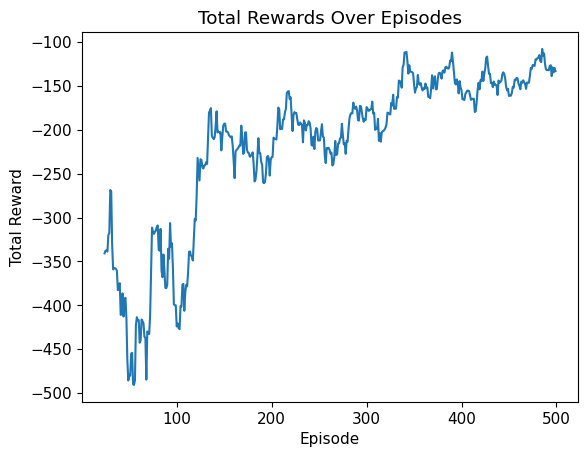

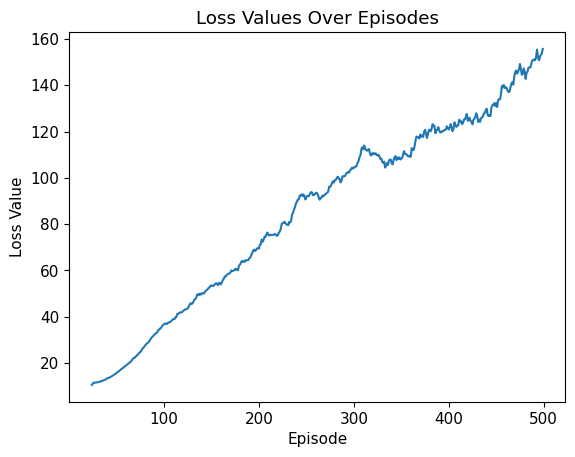

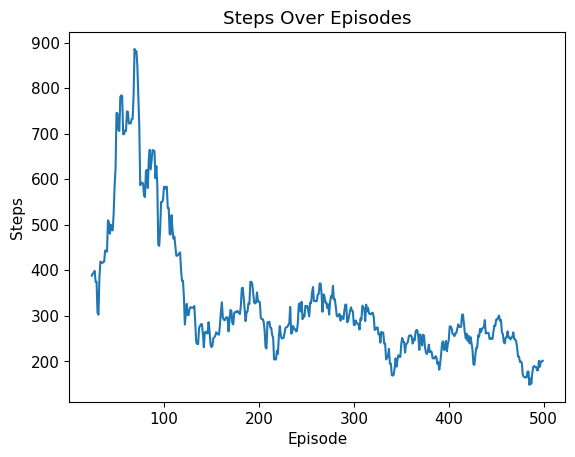

In [ ]:
agent.plot()

In [ ]:
agent.eval(total_episode=10)

KeyboardInterrupt: 